# Getting Started

## What will I learn?

We'll cover the fundamentals of data science through an in-depth exercise on a fun dataset containing boba places in Manhattan. At the end of this track, you'll have been exposed to data acquisition with the Google Maps and Foursquare APIs, data prep and cleaning with `pandas` and `numpy`, geospatial data visualization, and text analysis with `nltk`!


## What do I need to get started?

But before we even get started, we have to set our environment up. This guide was written in Python 3.6. If you haven't already, download [Python](https://www.python.org/downloads/) and [Pip](https://pip.pypa.io/en/stable/installing/). Once you have Python and Pip installed, clone [this repo](https://github.com/adicu/data-science) using Git as follows:

```
git clone https://github.com/adicu/data-science
```


Next, you’ll need to install several packages that we’ll use throughout this tutorial on the command line in our project directory:

```
pip install -r requirements.txt
```

We'll be using the [Google Maps](https://developers.google.com/maps/documentation/geocoding/get-api-key) and [Foursquare](https://developer.foursquare.com/docs/api/getting-started) APIs, so make sure to generate your API keys. Since we’ll be working with Python throughout, using the [Jupyter Notebook](http://jupyter.readthedocs.io/en/latest/install.html) is the best way to get the most out of this tutorial. Once you have your notebook up and running, you can download all the data for this post from [GitHub](https://github.com/adicu/devfest-data-science). Make sure you have the data in the same directory as your notebook and then we’re good to go! 


## A Quick Note on Jupyter

For those of you who are unfamiliar with Jupyter notebooks, I’ve provided a brief review of which functions will be particularly useful to move along with this tutorial.

In the image below, you’ll see three buttons labeled 1-3 that will be important for you to get a grasp of -- the save button (1), add cell button (2), and run cell button (3). 

![ alt text](https://www.twilio.com/blog/wp-content/uploads/2017/09/qwigKpOsph32AcwRNBGAPyPf885eso4nSOungzHEaJ5cZceEH6R9AwN9ZQi1UX2K4DWK2NvvQYA5napOIz-pcfg6YzdCqSNGQUPv9bR1poJ6Pd3nUrToZ1DP3wRHZhiE_DbFbLsz.png)

The first button is the button you’ll use to **save your work** as you go along (1). Feel free to choose when to save your work. 

Next, we have the **“add cell”** button (2). Cells are blocks of code that you can run together. These are the building blocks of jupyter notebook because it provides the option of running code incrementally without having to to run all your code at once.  Throughout this tutorial, you’ll see lines of code blocked off -- each one should correspond to a cell. 

Lastly, there’s the **“run cell”** button (3). Jupyter Notebook doesn’t automatically run it your code for you; you have to tell it when by clicking this button. As with add button, once you’ve written each block of code in this tutorial onto your cell, you should then run it to see the output (if any). If any output is expected, note that it will also be shown in this tutorial so you know what to expect. _Make sure to run your code as you go along because many blocks of code in this tutorial rely on previous cells._


In [25]:
google_cli = 'your-key-here'
fs_id = 'your-key-here'
fs_secret = 'your-key-here'

# Background

You've likely heard the phrase 'data science' at some point of your life. Whether that be in the news, in a statistics or computer science course, or during your walk over to ferris for lunch. To demystify the term, let's first ask ourselves _what do we mean by data?_ 

Data is another ambiguous term, but more so because it can encompass so much. Anything that can be collected or transcribed can be data, whether it's numerical, text, images, sounds, anything!


## What is Data Science?

Data Science is where computer science and statistics intersect to solve problems involving sets of data. This can be simple statistical analysis like using R to compute means, medians, standard deviations for a numerical dataset, but it can also mean creating robust algorithms for artificial intelligence.

In other words, it's taking techniques developed in the areas of statistics and math and using them to learn from some sort of data source. 


## Is data science the same as machine learning?

While they do have overlap, they are not the same! The ultimate goal of data science is to use data for some sort of insight, and that _can_ often include learning how to do prediction from historical data. But it's not the full picture. Visualization, data acquisition and storage are just as important as using machine learning to "predict the future." 


### Why is Data Science important? 

Data Science has so much potential! By using data in creative and innovative ways, we can gain a lot of insight on the world, whether that be in economics, biology, sociology, math - any topic you can think of, data science has its own unique application. 


## Visualizing Maps

Anything in which location makes an impact on analysis or can be represented by location is likely going to be a geospatial problem. With different computational tools, we can create beautiful and meaningful visualizations that tell us about how location affects a given trend. To show this, we’ll use the python module `geojsonio` to visualize data across the United States. 

Data typically comes in the form of a few fundamental data types: strings, floats, integers, and booleans. Geospatial data, however, uses a different set of data types for its analyses. Using the `shapely` module, we’ll review what these different data types look like.

`shapely` has a class called `geometry` that contains different geometric objects. Using this module we'll import the needed data types:

In [2]:
from shapely.geometry import Point, Polygon

The simplest data type in geospatial analysis is the **Point** data type. Points are zero-dimensional objects representing a single location, or simply put, XY coordinates. In Python, this code looks like: 

In [3]:
p1 = Point(0,0)
print(p1)

POINT (0 0)


Notice that when we print `p1`, the output is `POINT (0 0)`. This indicated that the object returned isn't a built-in data type we'll see in Python. We can check this by asking Python to interpret whether or not the point is equivalent to the tuple `(0, 0)`:

In [4]:
print(p1 == (0,0))

False


Unsurprisingly, this returns `False`, and the reason for that is its type. If we print the type of `p1`, we *will* get a shapely Point object: 

In [5]:
print(type(p1))

<class 'shapely.geometry.point.Point'>


Next we have a **Polygon**, which is a two-dimensional surface that’s stored as a sequence of points that define the exterior. Because a polygon is composed of multiple points, the `shapely` polygon object takes a list of tuples as a parameter.

In [6]:
polygon = Polygon([(0,0),(1,1),(1,0)])

Oddly enough, the `shapely` Polygon object will not take a list of `shapely` points as a parameter. If we incorrectly input a Point, we'll get an error message.  

~~polygon = Polygon([Point(0,0), Point(1,1), Point(1,0)])~~ # Don't do this!

### Data Structures

**GeoJSON** is a format for representing geographic objects. It's different from regular json because it supports geometry types, such as: Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, and GeometryCollection. 

Using geojson, making visualizations becomes suddenly easier, as you'll see in a later section. This is primarily because geojson allows us to store collections of geometric data types in one central structure.

**GeoPandas** is a Python module used to make working with geospatial data in python easier by extending the datatypes used by pandas to allow spatial operations on geometric types.

Typically, `geopandas` is abbreviated with `gpd` and is used to read geojson data intro a DataFrame. Below you can see that we've printed out five rows of a geojson DataFrame: 

In [159]:
import pandas as pd
pd.read_csv("./data/boba.csv").head()

,Name,Address
0,108 Food Dried Hot Pot,"2794 Broadway, New York, NY 10025"
1,Auntea,"19A Mott St, New York, NY 10013"
2,Avalon New York,"208 W 23rd St, New York, NY 10011"
3,Bar Pa Tea,"85 Kenmare St, New York, NY 10012"
4,Boba Guys,"11 Waverly Pl, New York, NY 10002"


As you can see, it's just a simple DataFrame containing two columns: one with the name of the bubble tea place and its address.
To visualize each bubble tea place as a point on a map, we have to convert the addresses into coordinates. Eventually, we'll use these coordinates to create shapely Point geospatial objects. 

But first, let's review how these coordinates are obtained:

Because we don't have the latitude nor longitude, we'll use the geocoder and googlemaps modules to request the coordinates. Below you can see the API request with `geocoder.google()`. As a parameter, we provide the address which will be used to create the geospatial object. For this example, I've used the address of a building at Columbia University.


In [160]:
import os
import googlemaps
import geocoder

gmaps = googlemaps.Client(key=google_cli)

geocoder.google("2920 Broadway, New York, NY 10027")

<[OK] Google - Geocode [Alfred Lerner Hall, 2920 Broadway, New York, NY 10027, USA]>

This geospatial object has multiple attributes you can utilize, which you can read the documentation about [here](). For the purpose of this tutorial, we'll be using the `lat` and `lng` attributes. 

In [161]:
geocoder.google("2920 Broadway, New York, NY 10027").lat

40.8069421

In [162]:
geocoder.google("2920 Broadway, New York, NY 10027").lng

-73.9639939

With that said, let's use the code we've reviewed above to add three columns to our boba CSV DataFrame: `Latitude`, `Longitude`, and `Coordinates`. The workflow for this function will be created the longitude and latitude columns, and then using these columns to create the Point geospatial object with shapely.

In [163]:
from geopandas import GeoDataFrame
from geojsonio import display


class BubbleTea(object):
    
    # authentication initialized
    gmaps = googlemaps.Client(key=google_cli)

    # filename: file with list of bubble tea places and addresses
    def __init__(self, filename):
        # initalizes csv with list of bubble tea places to dataframe
        self.boba = pd.read_csv(filename)

    # new code here
    def calc_coords(self): 
        self.boba['Lat'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lat)
        self.boba['Longitude'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lng)
        self.boba['Coordinates'] = [Point(xy) for xy in zip(self.boba.Longitude, self.boba.Lat)]

The final step for this project is to visualize the geospatial data using `geojsonio`. But to use `geojsonio`, we need to convert the DataFrame above into geojson. Unfortunately it's not as straightforward because our original data was in a CSV format. Fortunately, we can convert this with a few lines of code. More specifically, we'll great three get methods for our `visualize()` function to work. 

The first, `get_geo()` returns the coordinates as a list. Because of our limits in API calls, `NaN` values are returned in some instances. This can lead to geojson parsing issues, so to avoid that, we remove these values with the very useful `dropna()` function and reset the indices. 

In [164]:
class BubbleTea(object):
    
    # authentication initialized
    gmaps = googlemaps.Client(key=google_cli)

    # filename: file with list of bubble tea places and addresses
    def __init__(self, filename):
        # initalizes csv with list of bubble tea places to dataframe
        self.boba = pd.read_csv(filename)


    def calc_coords(self): 
        self.boba['Lat'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lat)
        self.boba['Longitude'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lng)
        self.boba['Coordinates'] = [Point(xy) for xy in zip(self.boba.Longitude, self.boba.Lat)]
    
    # new code here
    def get_geo(self):
        self.boba = self.boba.dropna()
        self.boba = self.boba.reset_index()
        return(list(self.boba['Coordinates']))

`get_names()` returns the Name column as series so we're able to see labels for each bubble tea place on the map. As with the previous function, we need to drop the `NaN` values and reset the indices. 

In [165]:
class BubbleTea(object):
    
    # authentication initialized
    gmaps = googlemaps.Client(key=google_cli)

    # filename: file with list of bubble tea places and addresses
    def __init__(self, filename):
        # initalizes csv with list of bubble tea places to dataframe
        self.boba = pd.read_csv(filename)

    def calc_coords(self): 
        self.boba['Lat'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lat)
        self.boba['Longitude'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lng)
        self.boba['Coordinates'] = [Point(xy) for xy in zip(self.boba.Longitude, self.boba.Lat)]

    def get_geo(self):
        self.boba = self.boba.dropna()
        self.boba = self.boba.reset_index()
        return(list(self.boba['Coordinates']))
         
    # new code below
    def get_names(self):
        return(self.boba['Name'])

And finally, `get_gdf()` converts all the data into a GeoDataFrame and then returns a GeoDataFrame. This is where we utilize the two previous functions since the first parameter requires the indices to be a series and the `geometry` parameter requires a list.  

In [166]:
class BubbleTea(object):
    
    # authentication initialized
    gmaps = googlemaps.Client(key=google_cli)

    # filename: file with list of bubble tea places and addresses
    def __init__(self, filename):
        # initalizes csv with list of bubble tea places to dataframe
        self.boba = pd.read_csv(filename)

    def calc_coords(self): 
        self.boba['Lat'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lat)
        self.boba['Longitude'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lng)
        self.boba['Coordinates'] = [Point(xy) for xy in zip(self.boba.Longitude, self.boba.Lat)]

    def get_geo(self):
        self.boba = self.boba.dropna()
        self.boba = self.boba.reset_index()
        return(list(self.boba['Coordinates']))
        
    def get_names(self):
        self.boba = self.boba.dropna()
        self.boba = self.boba.reset_index()
        return(self.boba['Name'])
        
      
    # new code below
    def get_gdf(self):
        crs = {'init': 'epsg:4326'}
        return(GeoDataFrame(self.get_names(), crs=crs, geometry=self.get_geo()))

Great! Now let's use `geojsonio` for some boba fun! Now that we have all our helper functions implemented, we can use them to deploy our visualization with `geojsonio`'s `display()` function. 

In [213]:
from geopandas import GeoDataFrame
from geojsonio import display
import pandas as pd

class BubbleTea(object):
    
    # authentication initialized
    gmaps = googlemaps.Client(key=google_cli)

    # filename: file with list of bubble tea places and addresses
    def __init__(self, filename):
        # initalizes csv with list of bubble tea places to dataframe
        self.boba = pd.read_csv(filename)

    def calc_coords(self): 
        self.boba['Lat'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lat)
        self.boba['Longitude'] = self.boba['Address'].apply(geocoder.google).apply(lambda x: x.lng)
        self.boba['Coordinates'] = [Point(xy) for xy in zip(self.boba.Longitude, self.boba.Lat)]

    def get_geo(self):
        self.boba = self.boba.dropna()
        self.boba = self.boba.reset_index()
        return(list(self.boba['Coordinates']))
        
    def get_names(self):
        self.boba = self.boba.dropna()
        self.boba = self.boba.reset_index()
        return(self.boba['Name'])
        
    def get_gdf(self):
        crs = {'init': 'epsg:4326'}
        return(GeoDataFrame(self.get_names(), crs=crs, geometry=self.get_geo()))


    # new code here
    def visualize(self):
        self.boba['Coordinates'] = [Point(xy) for xy in zip(self.boba.Longitude, self.boba.Lat)]
        updated = self.get_gdf()
        display(updated.to_json()) 

And we've done it! Our *BubbleTea* is finished and ready to be used, so let's get to the actual visualization.

First, we initialize the class with our boba file. Remember, this only initializes what's in the constructor, so as of now, we only have a pandas DataFrame created.

In [214]:
boba = BubbleTea("./data/boba.csv")

Next we call the `calc_coords()` method. Recall that this function makes API calls to google maps for the latitude and longitude and then takes these two columns to convert to a shapely Point object. 

Because of the many Google Maps API calls, expect this to take a while. 

In [215]:
boba.calc_coords()

The longest part is over! Now we're ready for our awesome boba map:

In [216]:
boba.visualize()

The map should have opened up in a new tab in your browser. You can use this map to embed on a website or in a GitHub gist, as shown [here](https://gist.github.com/lesley2958/b10774fa2e3903ee078b8619d8c14be5). The combination of these modules we used makes for a fast and easy way of creating map visualizations. 

## Checkpoint 1

Using `geojsonio` and GitHub Gists, create a GitHub Gist of the visualization on your own account! 

**Hint**: To do this, you will need to interact with the interface that popped up earlier. 

# Boba Recommendations

Finding good boba places is a hard task, especially when there are so many in New York. To make this easier for ourselves, we'll write a basic algorithm to generate bubble tea place recommendations. By the end of this exercise, you'll be able to select what flavor you want and we'll come up with a few places to try!

To begin with this exercise, we'll need reviews to make somewhat informed recommendations on boba places to try. Luckily websites like Yelp and Foursquare exist with this data, so we'll use the Foursquare API to extract these for each place.

In [75]:
import foursquare
import pandas as pd

In [76]:
boba_places = pd.read_csv('./data/boba_final.csv')

client = foursquare.Foursquare(client_id=fs_id, client_secret=fs_secret)

To search for each boba place in Foursquare, we'll need a few parameters that you can read about [here](https://developer.foursquare.com/docs/api/venues/search). For this specific example, `li` and `query` are sufficient enough parameters. Since the longitude and latitude are not in the needed string format, we have to manipulate this DataFrame to include this format first. 

Here, `.map(str)` preserves the string data type so that the latitude and longitude floats can be concatinated together.  

In [77]:
boba_places["li"] = boba_places['Lat'].map(str) + ", " + boba_places['Longitude'].map(str)

We don't need any of the columns besides `li` and `Name`, so we'll select these columns into a separate DataFrame for easy reference. 

In [78]:
boba_params = boba_places[['li', 'Name']]

To properly make an API request, the parameters need to not only be of the correct data type, but typically need to be included in a dictionary data structure. This is true for this example as well, so using `pandas` functions, we'll convert the DataFrame into a dictionary. 

In [79]:
params_list = boba_params.T.to_dict().values()

`params_list` has each of the boba places and their parameters for the `client.venues.search()` API calls, so we'll use these in the following snippet of code. Since these API calls return json's containing a large amount of information. Dumping this into a DataFrame would be messy, so instead we'll opt to using a list for all these json objects. 

In [80]:
queries = []
for i in params_list:
    queries.append(client.venues.search(params={'ll': i['li'], 'query': i['Name']}))

We ultimately need the tips for each business and each business's respect tip ids, which means we'll have to figure out exactly how to access them. But first, we need the foursquare IDs for each of the boba places. Let's print out one of the json objects so we can explore it: 

In [ ]:
print(queries[0])

The only relevant information here is the venues data, so we can select the data within that and explore it for the next step.

In [ ]:
print(queries[0]['venues'])

The `client.venues.search()` function call returns multiple businesses, from the most likely to the least. Since the parameters we gave were fairly specific, we'll assume that the first element is the correct one.  

In [ ]:
print(queries[0]['venues'][0])

And we're almost done! Now we just need the ids. If you look at the returned json object above, you'll see the `id` keyword with values that resemble a business ID. These keys are what we'll store in the `ids` list that we'll initialize in the next line of code.

In [84]:
print(queries[0]['venues'][0]['id'])

56d612c0498e1bd10360dca8


We still haven't actually added each `id` to that list, however. Since there are plenty of boba places, we'll want to iterate through the list and append each of the IDs to the list initialized below. Additionally, we'll initialize a key, value pair in the `tips_ids` dictionary initialized below. Later on we'll use this dictionary to add the tips to each business.

In [85]:
ids = []
tips_ids = {}
for i in queries:
    ids.append(i['venues'][0]['id'])
    tips_ids[i['venues'][0]['id']] = []

Now that we have all the business IDs, we can use these to call another [function](https://developer.foursquare.com/docs/api/venues/tips) in Foursquare's API. We'll make a function call for each business and append it to the `tips` list initialized below. Notice that the first element gives us no information, so we'll go ahead and delete that element afterward.

In [ ]:
tips = []
for i in ids:
    tips.append(client.venues.tips(VENUE_ID=i))
print(tips)
del tips[0]

And finally, we parse this data into two lists: one containing the foursquare ID and the other containing the actual review.

In [87]:
format_tips = []
ind = 0 
review_ids = []
for i in tips:
    for j in i['tips']['items']:
        format_tips.append(j['text'])
        tips_ids[ids[ind]].append(j['text'])
        review_ids.append(ids[ind])
    ind = ind + 1

In [88]:
print(format_tips[0])
print(review_ids[0])

Come to Boba Guys and take the train to Strawberry Matcha heaven. 🍓🍵
56d612c0498e1bd10360dca8


## Sentiment Analysis

We have all the reviews for each of the bubble tea places in New York City, but no way of actually deciding which to recommend. We _could_ look through them, one-by-one, and figure out which places are good, but that takes way too much time. To avoid that tedious process, we'll figure out that task using sentiment analysis. 

Sentiment analysis uses computational tools to determine the emotional tone behind words. Python has a bunch of handy libraries for statistics and machine learning so in this post we’ll use Scikit-learn to learn how to add sentiment analysis to our applications. This isn’t a new concept. There are thousands of labeled datasets out there, labels varying from simple positive and negative to more complex systems that determine how positive or negative is a given text.

In this tutorial we’ll use a pre-labeled dataset consisting of Amazon Reviews that are given a rating between 1-5. Using this data, we’ll build a model that assigns a food review a value of 1-5 with `sklearn`.

`sklearn` is a Python module with built-in machine learning algorithms. In this tutorial, we’ll specifically use the Logistic Regression model, which is a linear model commonly used for classification.

Using the file we created in part 1, `boba_final.csv` we'll pull the tips for each venue using the Foursquare API. Since we taked it as a csv file, we can use pandas once again to read in the data as a DataFrame. To use the foursquare API in Python, you'll need to call `foursquare.Foursquare()` with your API keys to connect to the client.  

## Preparing the Data

Before we implement our classifier, we need to format the data. Using `sklearn.feature_extraction.text.CountVectorizer`, we will convert the tweets to a matrix, or two-dimensional array, of word counts. Ultimately, the classifier will use these vector counts to train.

First, we import all the needed modules:

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

Next we'll import the data we’ll be working with. Each row in the csv file refers to a review. As we have done in past exercises, we will use `pandas` to read in the file. From there, we will select the two relevant columns for the classifier we will built soon. Below, you'll see two lists: one for the reviews and one for the ratings of 1-5. We chose this format so that we can check how accurate the model we build is. To do this, we test the classifier on unlabeled data since feeding in the labels, which you can think of as the “answers”, would be “cheating”. 

In [90]:
test_data = pd.read_csv("./data/reviews.csv")
data = list(test_data['Text'])
data_labels = list(test_data['Score'])

Next, we initialize a sckit-learn vector with the CountVectorizer class. Because the data could be in any format, we’ll set lowercase to False and exclude common words such as “the” or “and”. This vectorizer will transform our data into vectors of features. In this case, we use a CountVector, which means that our features are counts of the words that occur in our dataset. Once the CountVectorizer class is initialized, we fit it onto the data above and convert it to an array for easy usage.

In [91]:
vectorizer = TfidfVectorizer(
    analyzer = 'word',
    lowercase = True,
)
features = vectorizer.fit_transform(
    data
)

features_nd = features.toarray()

As a final step, we’ll split the training data to get an evaluation set through Scikit-learn’s built-in cross_validation function. All we need to do is provide the data and assign a training percentage (in this case, 90%).

In [92]:
from sklearn.cross_validation import train_test_split
 
X_train, X_test, y_train, y_test  = train_test_split(
        features_nd, 
        data_labels,
        train_size=0.90, 
        random_state=1234)

/Users/lesleycordero/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Linear Classifier

We can now build the classifier for this dataset. As mentioned before, we’ll be using the LogisticRegression class from Scikit-learn, so we start there:

In [93]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

Once the model is initialized, we have to train it to our specific dataset, so we use Scikit-learn’s fit method to do so. This is where our machine learning classifier actually learns the underlying functions that produce our results.

In [94]:
log_model = log_model.fit(X=X_train, y=y_train)

And finally, we use log_model to label the evaluation set we created earlier:

In [95]:
y_pred = log_model.predict(X_test)

## Accuracy

Now just for our own fun, let’s take a look at some of the classifications our model makes. We’ll choose a random set of tweets from our test data and then call our model on each. Your output may be different, but here’s the random set that my code generated:

Just glancing over the examples above, it’s pretty obvious there are some misclassifications. But we want to do more than just ‘eyeball’ the data, so let’s use Scikit-learn to calculate an accuracy score.

After all, how can we trust a machine learning algorithm if we have no idea how it performs? This is why we left some of the dataset for testing purposes. In Scikit-learn, there is a function called sklearn.metrics.accuracy_score which calculates what percentage of tweets are classified correctly. Using this, we see that this model has an accuracy of about 61%.

In [96]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.699


70% is better than randomly guessing (20% random guessing), but still fairly prone to error. With that said, we pulled this classifier together with fewer than 20 lines of code. Even though we don’t have the best results, `sckit-learn` provided us with a solid model that we can improve on if we change some of the parameters we saw throughout this post. For example, maybe the model needs less training data? Maybe we should have selected 80% of the data for training instead of 90%? Maybe we should have cleaned the data by checking for misspellings or taking out special characters.   


## Checkpoint 2

These are all important questions to ask yourself as you utilize powerful machine learning modules like Scikit-learn. For the rest of this challenge, try some of these techniques and any other techniques you can think of. Show us your results and what you did! 

# Get The Recs!

Now that the tips are in a list, we can transform them to the necessary vector of sentence features. With these features, we'll then use the model we created earlier, `log_model` to classify each tip with a rating of 1-5. This is so that we can then choose which bubble tea places have the highest ratings for their reviews.

In [97]:
X_test = vectorizer.transform(format_tips)
predictions = log_model.predict(X_test) 
boba_places['id'] = pd.Series(ids) # this adds the business id to the dataframe

Now we have three important components of data: 

1. `format_tips`: the actual text of reviews
2. `rating`: the predicted ratings for each review 
3. `review_ids`: the foursquare ids to the reviews

Since `pandas` is awesome and fast, we'll convert these lists to series and then combine them into one DataFrame.

In [98]:
tip = pd.Series(format_tips)
rating = pd.Series(predictions)
bus_ids = pd.Series(review_ids)
reviews = pd.DataFrame(dict(tip=tip, rating=rating, bus_ids=bus_ids))

After polling [ADI Committee](https://adicu.com/committee/)'s favorite bubble tea flavors, we came up with the following list of bubble tea flavors -- we'll use these to figure out what flavor a tip is referring to. Note: this isn't a complete list because there are so many bubble tea flavors! Feel free to add any you think we should have included. 

In [99]:
boba_flavors = ['almond', 'apple', 'black', 'caramel', 'chai', 'classic', 'coconut', 
                'coffee', 'chocolate', 'earl', 'french', 'ginger', 'grapefruit', 'green', 
                'hazelnut', 'horchata', 'honey', 'honeydew', 'jasmine', 'lavender', 
                'lemon', 'lychee', 'mango', 'matcha', 'oolong', 'passion', 'peach', 
                'regular', 'rose', 'sesame', 'strawberry', 'taro', 'thai', 'vanilla', 'watermelon']

With all the information we have collected so far, we need to figure out which boba flavor a given tip is referring to. To do this, we will use `numpy` and create a new column of `nan` values, which we will then replace with the boba flavors.

In [100]:
import numpy as np
reviews['flavor'] = np.nan

Right now we have no idea what a given tip is reviewing -- the reviewer could be commenting on the place's hours, location, actual food, customer service, etc. We, however, want tips that have to do with a particular bubble tea flavor, so to filter these out, we'll iterate through each tip and check whether it contains any of the key words in the `boba_flavors` list. If we find a flavor, then we replace the `flavor` column of the reviews DataFrame with that flavor!

Note: This should take a few minutes to run. 

In [101]:
for i in range(len(reviews)):
    buff = reviews['tip'][i].lower().split()
    for j in boba_flavors:
        if j in buff:
            reviews['flavor'][i] = j

/Users/lesleycordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/lesleycordero/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Checkpoint 3

The code snippet above does what we need it to, but is unfortunately very slow! Change (or rewrite!) the code so that the speedtime is better and show us your results.

If there's no mention of favors, the review doesn't tell us about the quality of a specific flavor and the `nan` value won't be replaced. Since we used `numpy` to initialize the columns, we can use the `dropna()` function in `pandas` to delete all these useless rows. 

In [102]:
reviews.dropna(axis = 0, inplace = True)

With such a large number of tips, there's bound to be repetition with what flavors are reviewed for a given business. For example, [Gong Cha](http://www.gongchausa.com/) likely has multiple reviews for each of its flavors, especially the more popular ones. 

This is actually a good thing -- it will inform our recommendations more if we have more tips! But we definitely have to handle this, so we use the `pandas` function, `groupby()` to get the average ratings for each flavor, for each bubble tea place!

In [103]:
full_ratings = reviews.groupby(['bus_ids', 'flavor']).rating.mean()

So that we can use this more `pandas` functions later on, we convert this `groupby()` into a DataFrame and sort it by flavor first for organizational purposes. The second line of code here resets the indices so that we don't have them out of order.

In [107]:
full_ratings_df = pd.DataFrame(full_ratings).groupby(['flavor', 'bus_ids']).rating.mean()

In [108]:
full_ratings_df = full_ratings_df.reset_index()

We only want to recommend the **best** bubble tea out there, so we will take the bubble tea places with the best ratings. In `pandas`, there's a useful function `max()` that selects the largest value of a given column. 

In [134]:
def func(group):
    return group.loc[group['rating'] == group['rating'].max()]

recs = full_ratings_df.groupby('flavor', as_index=False).apply(func).reset_index(drop=True)

Let's take a brief look at our results:

In [ ]:
print(recs)

Now we are at the part we have all been waiting for! Boba Recommendations. My favorite boba flavor is **Matcha** so the example we will review is recommendations for matcha. We'll set this preference in a variable named `WHAT_DO_YOU_WANT`. 

In [123]:
WHAT_DO_YOU_WANT = "matcha"

As you have seen before, we will now filter the DataFrame for boba places containing this flavor. Recall that filtering refers to the action of selecting rows based on a _conditional statement_.

In [114]:
recs_df = recs[recs['flavor'] == WHAT_DO_YOU_WANT]

In [115]:
recs_df

,flavor,bus_ids,rating
123,matcha,4a83505ef964a520bffa1fe3,5.0
124,matcha,565727c7498eb4078c560050,5.0
125,matcha,56d612c0498e1bd10360dca8,5.0
126,matcha,582f75cd9f25833ffdc95f26,5.0
127,matcha,58a4cf2e98f8aa3b35181410,5.0
128,matcha,58aca06476b8b276978f1732,5.0
129,matcha,58c95f4c2bc5e266eed6d80a,5.0


In the DataFrame we created above, the `bus_ids` contains the ids of each boba place. We will use these business ids to print out the bubble tea places I should try!

## Checkpoint 4

Change the `WHAT_DO_YOU_WANT` variable with your favorite bubble tea flavor and see what recommendations you get!

## What are people saying? 



In the challenges above, we tried our best to paint a picture of how tasty a given bubble tea's place different boba flavors are, but what about these bubble tea places overall? 

In [61]:
text = " ".join(list(reviews[bus_ids == bus_ids[5]]['tip']))

/Users/lesleycordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Python has a library [wordcloud](https://github.com/amueller/word_cloud) that provides functions to generate an image of our most frequent words in a given text. Using the string of every single title we’ve put together we can use wordcloud to create a wordcloud visualization.

In [62]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Notice we also imported `STOPWORDS` from the `wordcloud` module. These are to keep from visualizing words like “the”, “and”, “or” from appearing in the wordcloud. Words like these will clearly occur frequently but provide no insight as to what topics we’re reading about. So the built-in set of stop words will be removed from the final wordcloud visualization:

In [63]:
stopwords = set(list(STOPWORDS) + boba_flavors + ["boba", "tea"])

This might be hard to believe but now we can initialize the wordcloud object! This object is what represents the image we’ll use [matplotlib](https://matplotlib.org/) to output.

In [64]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white")

As a last step for creating the `wordcloud` object we fit the model to the string of all titles:

In [65]:
wordcloud.generate(text)

And finally we invoke matplotlib to display our image. For this example we won’t do any special customization but in case you’re interested in how to go about doing this [check the documentation](https://matplotlib.org/).

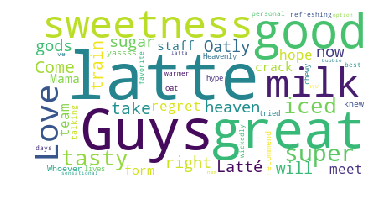

In [66]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Checkpoint 5

Some of the words that appear in the wordcloud are not very informative. For example, `latte` and `milk` do not really tell us more other than this boba place likely offers both. Manipulate the code so that we get a more representative visualization. 

And that's a wrap! Over the past sections, you have reviewed a variety topics to help complete this boba themed challenge. 

Let's quickly summarize what you learned:

- How to use pandas and numpy in the context of a data science problem
- Geospatial Mapping with geojsonio & shapely
- How to use APIs through Google Maps & Foursquare
- Sentiment Analysis with sklearn
- Data Visualizations with WordCloud

### Acknowledgments 

Curriculum Writer Lead: [Lesley Cordero](https://www.columbia.edu/~lc2958)<br>
Curriculum Reviewers: [Andrew Aday]()

A lot of this content was created originally for [Twilio's Blog](twilio.com/blog) and has been changed for the purposes of a curriculum that fits well together.

If you're intersted in reading the original sources, you can find them [here](https://www.twilio.com/blog/2017/12/sentiment-analysis-scikit-learn.html) and [here](https://www.twilio.com/blog/2017/09/boba-python-google-maps-geojson.html). 